In [37]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


In [38]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [39]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [40]:
train_images.shape

(60000, 28, 28)

In [41]:
len(train_labels)

60000

In [42]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [43]:
test_images.shape

(10000, 28, 28)

In [44]:
len(test_labels)

10000

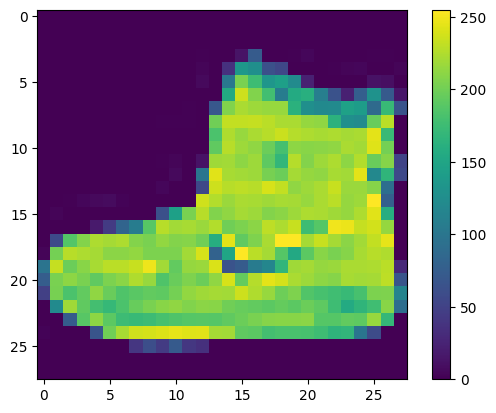

In [45]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [46]:
train_images = train_images / 255.0

test_images = test_images / 255.0

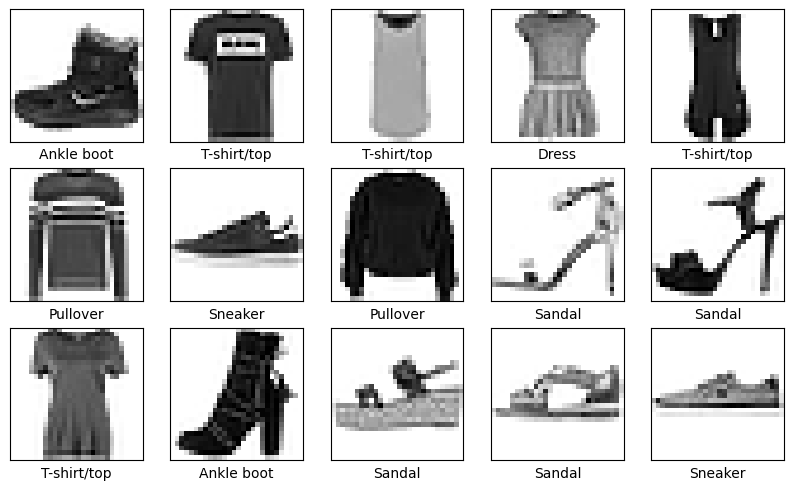

In [47]:
plt.figure(figsize=(10,10))
for i in range(15):#primeros 15 imagenes
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [48]:
#cambios en modelo para ver si mejora (puse arriba el codigo porque como no mejoraba para que no afectara la secuencia del codigo)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),  # Cambio en el número de neuronas
    keras.layers.Dropout(0.5),  # Agregar Dropout para regularización
    keras.layers.Dense(128, activation='relu'),  # Capa oculta adicional
    keras.layers.Dense(10, activation='softmax')
])

In [49]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
model.fit(train_images, train_labels, epochs=15, batch_size=64)  # Cambio en el tamaño del lote

Epoch 1/15
938/938 [==============================] - 11s 11ms/step - loss: 0.5963 - accuracy: 0.7823
Epoch 2/15
938/938 [==============================] - 7s 7ms/step - loss: 0.4530 - accuracy: 0.8337
Epoch 3/15
938/938 [==============================] - 9s 9ms/step - loss: 0.4203 - accuracy: 0.8452
Epoch 4/15
938/938 [==============================] - 6s 7ms/step - loss: 0.3971 - accuracy: 0.8558
Epoch 5/15
938/938 [==============================] - 8s 9ms/step - loss: 0.3795 - accuracy: 0.8595
Epoch 6/15
938/938 [==============================] - 7s 7ms/step - loss: 0.3672 - accuracy: 0.8632
Epoch 7/15
938/938 [==============================] - 8s 9ms/step - loss: 0.3599 - accuracy: 0.8665
Epoch 8/15
938/938 [==============================] - 7s 7ms/step - loss: 0.3495 - accuracy: 0.8702
Epoch 9/15
938/938 [==============================] - 8s 9ms/step - loss: 0.3423 - accuracy: 0.8723
Epoch 10/15
938/938 [==============================] - 7s 7ms/step - loss: 0.3355 - accuracy: 0.87

In [51]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3365 - accuracy: 0.8750 - 769ms/epoch - 2ms/step

Test accuracy: 0.875


In [52]:
#modelo inicial
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),#si cambia este num, linea 32 error, debido a que son los pixeles
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [53]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
model.fit(train_images, train_labels, epochs=15)# los epochs se pueden modificar, ya que son las epocas

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4976 - accuracy: 0.8240
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3754 - accuracy: 0.8644
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3366 - accuracy: 0.8767
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3117 - accuracy: 0.8870
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2950 - accuracy: 0.8906
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2803 - accuracy: 0.8957
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2683 - accuracy: 0.9004
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2564 - accuracy: 0.9058
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2479 - accuracy: 0.9078
Epoch 10/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.23

In [55]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3515 - accuracy: 0.8875 - 947ms/epoch - 3ms/step

Test accuracy: 0.887499988079071


In [56]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [57]:
predictions[0]

array([3.7549652e-10, 3.1911022e-11, 3.1201187e-11, 1.7138543e-10,
       1.5723560e-09, 8.4122447e-03, 9.5648023e-10, 4.4474318e-03,
       2.0705913e-09, 9.8714036e-01], dtype=float32)

In [58]:
np.argmax(predictions[0])

9

In [59]:
test_labels[0]

9

In [60]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))#no se peuden cambiar el rango
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

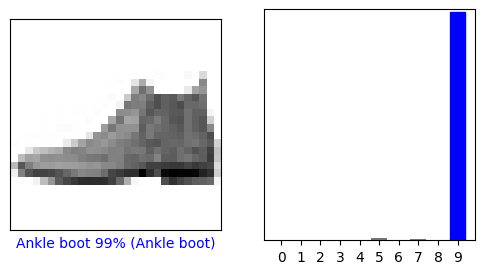

In [61]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

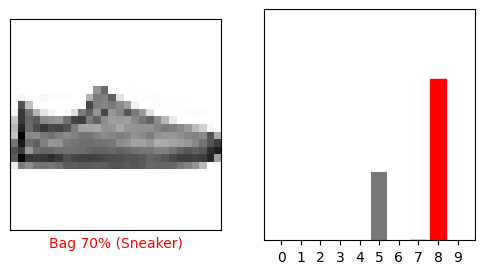

In [62]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

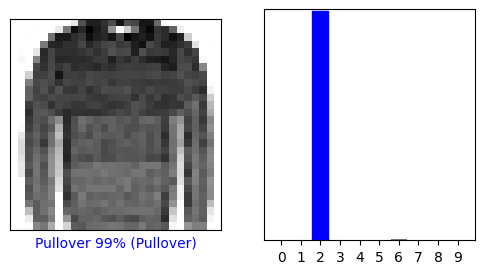

In [63]:
i = 20   #nueva
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

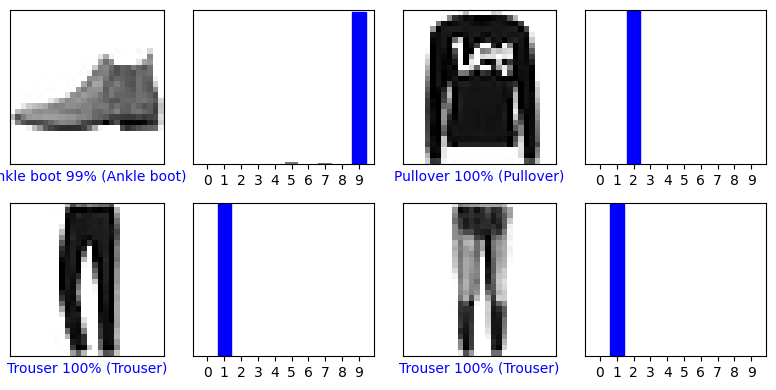

In [64]:
num_rows = 2
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [65]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [66]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [67]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 24ms/step
[[6.6917099e-05 6.5513060e-18 9.9942857e-01 1.3247458e-14 4.9841014e-04
  1.8253401e-13 6.1290352e-06 1.8187551e-16 9.7169295e-14 1.1758661e-19]]


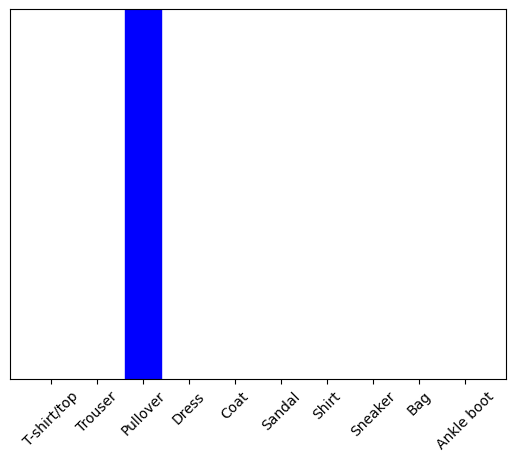

In [68]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [69]:
np.argmax(predictions_single[0])

2